# Importing Libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs

# Step 1 initialise random centers

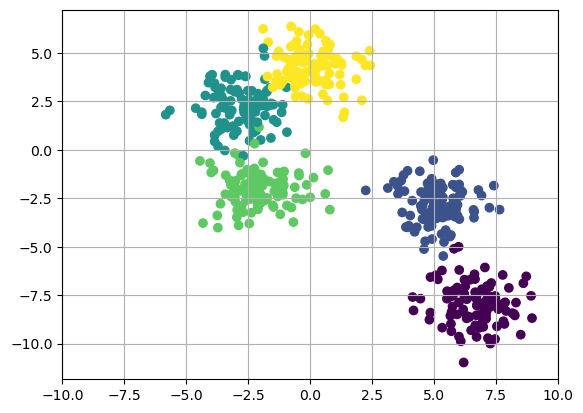

In [4]:
X, y = make_blobs(n_samples=500, n_features=2, centers=5, random_state=44)
fig = plt.figure(0)
plt.grid(True)
plt.xlim(-10, 10)
plt.scatter(x=X[:, 0], y=X[:, 1], c=y)
plt.show()

In [5]:
k = 5
colors = ['green', 'cyan','yellow', 'blue', 'violet']
clusters = {}
for i in range(k):
    center = 10*(2*np.random.random((X.shape[1],))-1)
    points = []
    cluster = {
        "center": center,
        "points": [],
        "color": colors[i],
    }
    clusters[i] = cluster

In [6]:
10*(2*np.random.random((X.shape[1],))-1)

array([-5.41548896,  3.75476583])

In [7]:
np.random.random(X.shape[1])

array([0.58887802, 0.44785829])

In [8]:
clusters

{0: {'center': array([6.58567366, 2.2107213 ]),
  'points': [],
  'color': 'green'},
 1: {'center': array([-8.30085701,  3.13369687]),
  'points': [],
  'color': 'cyan'},
 2: {'center': array([ 9.50272309, -3.19487217]),
  'points': [],
  'color': 'yellow'},
 3: {'center': array([ 9.17683738, -8.8325461 ]),
  'points': [],
  'color': 'blue'},
 4: {'center': array([1.26218243, 0.01399994]),
  'points': [],
  'color': 'violet'}}

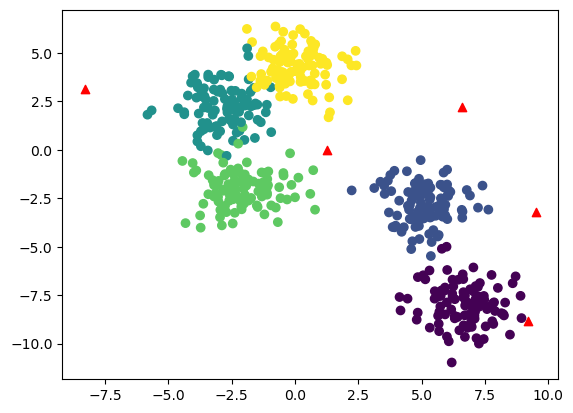

In [9]:
plt.scatter(X[:, 0], X[:, 1], c=y)
for i in clusters:
    center = clusters[i]["center"]
    plt.scatter(center[0], center[1], marker = "^", c='red')
plt.show()

# Step 2(E-Step) Assign every poitn to their centers

In [10]:
def distance(v1, v2):
    return np.sqrt(np.sum((v1 - v2)**2))

In [11]:
v1 = np.array([1, 2])
v2 = np.array([3, 4])
distance(v1, v2)

2.8284271247461903

In [12]:
def assigning_clusters():
    for idx in range(X.shape[0]):
        dist = []
        curr_x = X[idx]
        for i in range(k):
            dist.append(distance(curr_x, clusters[i]["center"]))
        current_cluster = np.argmin(dist)
        clusters[current_cluster]["points"].append(curr_x)

In [13]:
assigning_clusters()

In [14]:
clusters

{0: {'center': array([6.58567366, 2.2107213 ]),
  'points': [array([ 4.95649167, -0.5321402 ]),
   array([ 5.2565813 , -1.73515257]),
   array([2.38841405, 5.10996744]),
   array([ 6.00147572, -1.02347305]),
   array([ 5.8630787 , -1.17424449])],
  'color': 'green'},
 1: {'center': array([-8.30085701,  3.13369687]),
  'points': [array([-3.05400363,  3.00057263]),
   array([-3.80571019,  1.872321  ]),
   array([-3.44093916,  2.16052667]),
   array([-3.72066508,  0.96165713]),
   array([-3.45495423,  2.20120251]),
   array([-3.95853549,  3.88046824]),
   array([-3.43136185,  3.75262078]),
   array([-3.21126437,  3.1104754 ]),
   array([-3.75508633,  2.78239644]),
   array([-4.37857217,  1.941791  ]),
   array([-5.66579767,  2.03762642]),
   array([-2.92516715,  3.87557929]),
   array([-2.89455842,  3.84689576]),
   array([-3.53315727,  2.60696502]),
   array([-3.86843844,  3.44019613]),
   array([-4.04754195,  3.79703168]),
   array([-3.84095835,  3.2249257 ]),
   array([-3.89564954,  2.

In [15]:
def plot_clusters():
    for i in clusters:
        pts = np.array(clusters[i]["points"])
        try:
            plt.scatter(pts[:, 0], pts[:, 1], c=clusters[i]["color"])
        except:
            pass
        center = clusters[i]["center"]
        plt.scatter(center[0], center[1], marker="^", c='red')

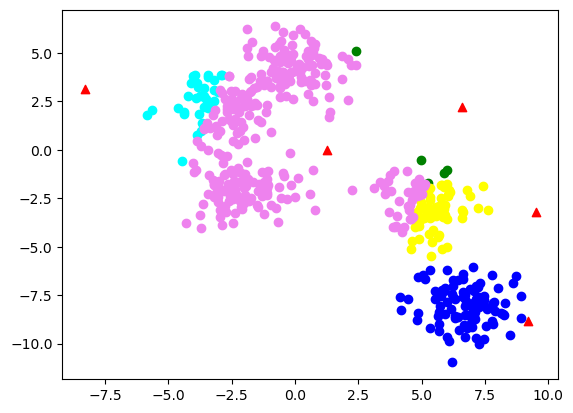

In [16]:
plot_clusters()

# Step 3(M-Step) Updating center location by taking mean

In [19]:
def update_clusters():
    for idx in range(k):
        pts = np.array(clusters[idx]["points"])
        if pts.shape[0] > 0:
            new_center = pts.mean(axis=0)
            clusters[idx]["center"] = new_center
            clusters[idx]["points"] = []

In [20]:
update_clusters()

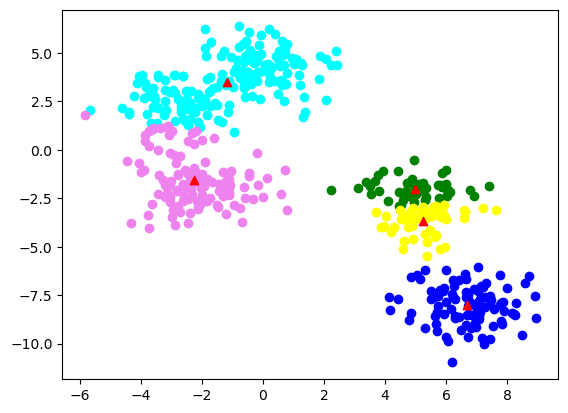

In [36]:
assigning_clusters()
plot_clusters()
update_clusters()

In [37]:
from sklearn.cluster import KMeans

In [38]:
km = KMeans(n_clusters=5)

In [39]:
X, y = make_blobs(n_samples=500, n_features=2, centers=5, random_state=44) 

In [40]:
km.fit(X, y)

C:\Users\sound\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\sound\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


KMeans(n_clusters=5)

In [41]:
km.cluster_centers_

array([[ 0.03897133,  4.26667775],
       [ 6.68097218, -8.0139084 ],
       [-2.08530969, -2.04027226],
       [ 5.12908767, -2.86442829],
       [-2.82850859,  2.17781228]])

In [42]:
centers = km.cluster_centers_

In [43]:
labels = km.labels_

In [44]:
print(labels)

[1 2 3 2 4 3 0 3 1 2 1 2 4 3 1 4 4 1 1 4 1 0 2 1 2 4 2 3 1 1 1 0 4 2 0 0 3
 4 0 3 4 2 4 4 2 4 4 3 2 0 4 4 3 3 4 2 3 4 1 4 4 1 2 2 0 0 1 4 3 4 3 3 1 2
 0 4 3 0 1 3 4 4 0 2 4 4 1 4 0 1 3 3 2 4 2 0 4 3 1 3 0 0 1 4 2 0 1 3 0 4 1
 0 3 0 3 3 2 0 2 2 3 1 3 4 2 0 1 4 4 2 4 2 3 0 3 4 1 2 0 0 1 0 4 3 4 3 4 0
 1 3 4 2 2 2 0 4 0 4 1 0 0 1 4 2 0 0 4 3 0 3 4 4 2 1 4 3 0 2 2 1 3 0 4 0 1
 1 0 1 2 0 2 2 2 4 0 3 2 1 0 4 1 2 1 3 4 1 0 4 4 1 2 2 3 4 2 1 4 4 0 3 2 3
 4 4 4 0 3 1 0 3 0 4 0 2 0 1 1 0 2 3 1 0 4 1 1 4 1 0 1 3 3 0 4 1 2 2 0 0 2
 2 1 4 1 1 0 3 3 4 4 4 2 0 3 4 3 4 4 3 0 2 4 2 3 0 0 2 0 1 4 0 3 3 2 3 0 1
 3 2 3 0 3 1 3 4 0 1 0 3 0 3 1 3 3 3 0 2 3 3 1 0 3 0 3 2 0 4 0 3 1 2 0 2 1
 1 2 4 1 4 1 0 1 3 0 3 3 2 4 2 2 2 2 2 1 0 1 3 1 4 1 0 0 2 3 1 0 1 1 1 4 1
 4 4 2 4 3 2 1 1 1 2 4 0 4 0 0 3 1 3 2 3 1 0 4 3 4 3 2 4 2 4 1 1 3 0 2 3 1
 4 1 4 2 3 1 3 0 2 0 2 1 2 1 0 2 2 3 0 3 4 4 3 0 3 0 4 1 3 1 2 4 1 4 4 3 1
 3 2 1 2 3 0 1 2 0 2 0 2 0 3 4 2 3 1 0 0 2 3 0 2 2 3 2 1 3 1 4 4 0 3 3 0 2
 2 2 3 1 0 2 1 3 0 3 2 2 

In [45]:
print(len(labels))

500


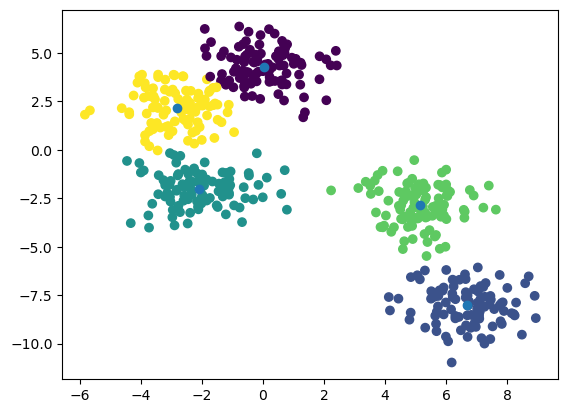

In [49]:
plt.scatter(X[:, 0], X[:, 1], c=labels)
plt.scatter(centers[:, 0], centers[:, 1])